### **Name:** *`Urooj Fatima`*  
### **DHC-ID:** `DHC-29`   
### **Domain:** *`AI/ML Engineering Internship Tasks`*  
# **`DevelopersHub Corporation`**

>   
# Task:02  "Heart Disease Prediction"
### Problem Statement:  
> Cardiovascular diseases are among the leading causes of death worldwide.  
Early detection can significantly improve the chances of treatment and recovery.  
The task is to develop a machine learning model that can predict whether a person is at risk of heart disease based on their health indicators.  
### Goal:  
> Use patient health records to train a classification model.  
Predict whether a given individual is at risk (1) or not at risk (0) for heart disease.  
Evaluate the model using accuracy, confusion matrix, and ROC-AUC curve.  

In [4]:
# ------------------------------
# 1. Import Required Libraries
# ------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [6]:
# ------------------------------
# 2. Load the Dataset
# ------------------------------
df = pd.read_csv("C:\\Users\\MSS\\Downloads\\heart.csv")

In [8]:
# ------------------------------
# 3. Data Cleaning & Inspection
# ------------------------------
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)
print("\nFirst 5 Rows:\n", df.head())

Dataset Shape: (1025, 14)

Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data Types:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

First 5 Rows:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0   

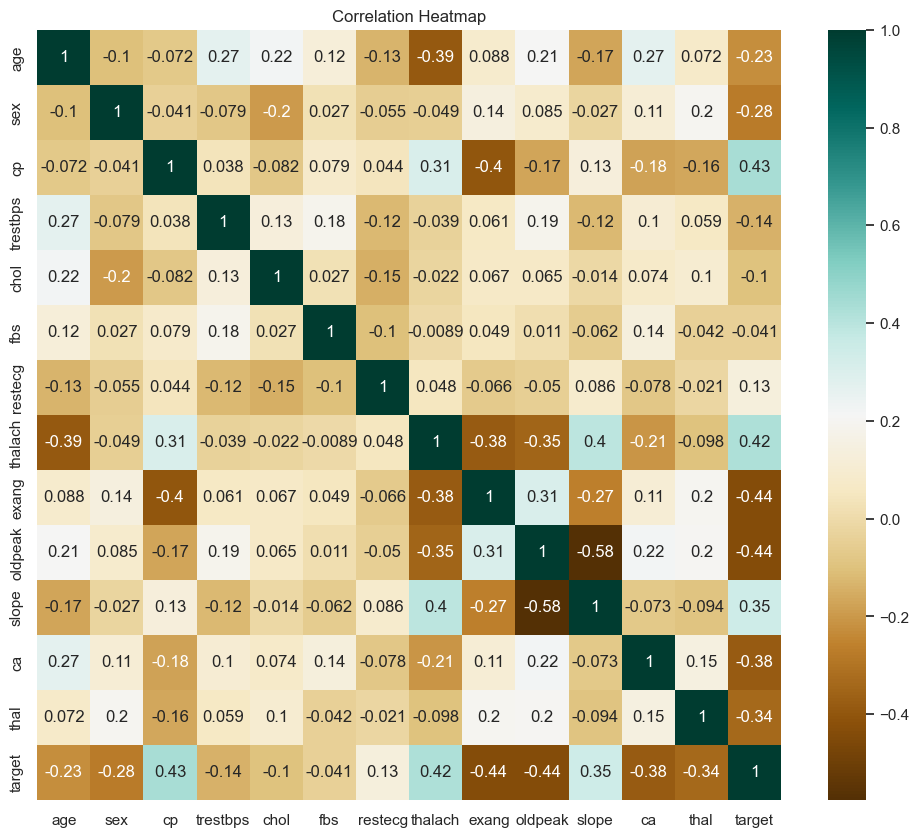

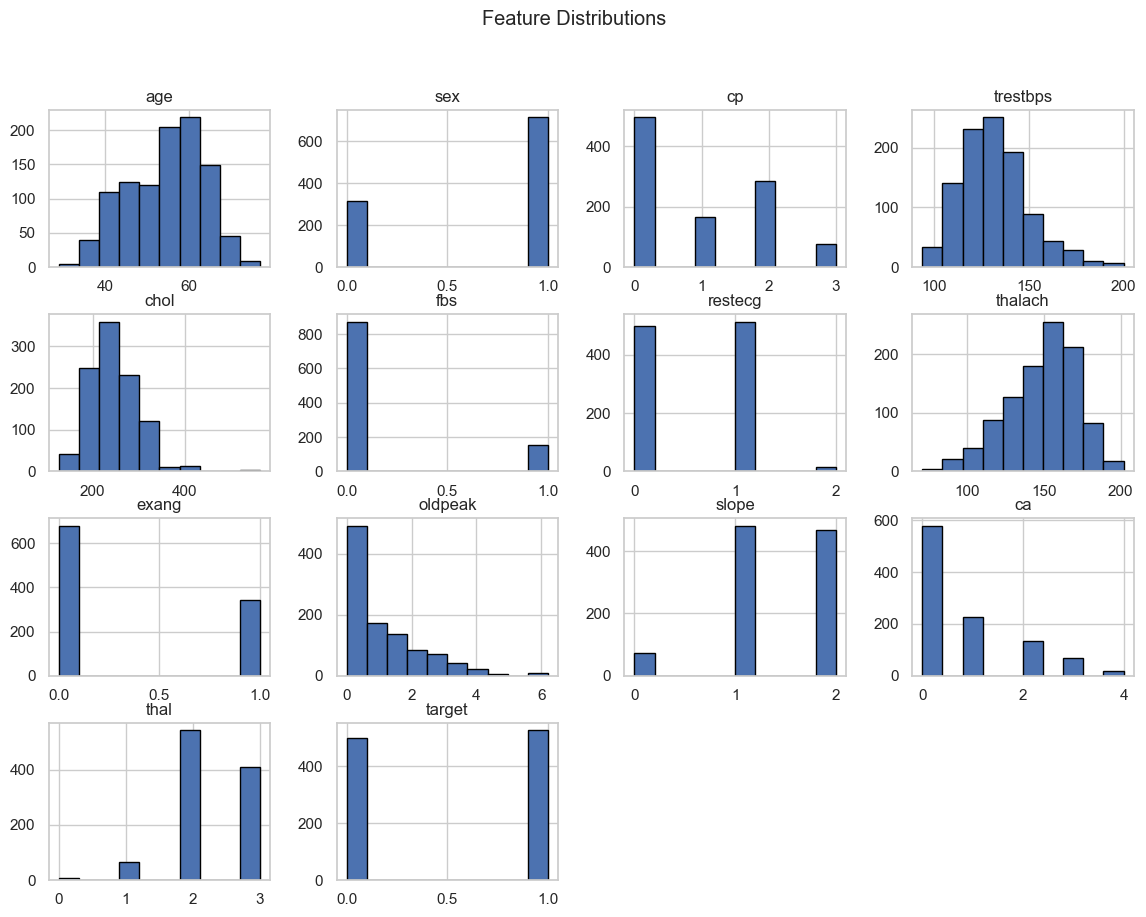

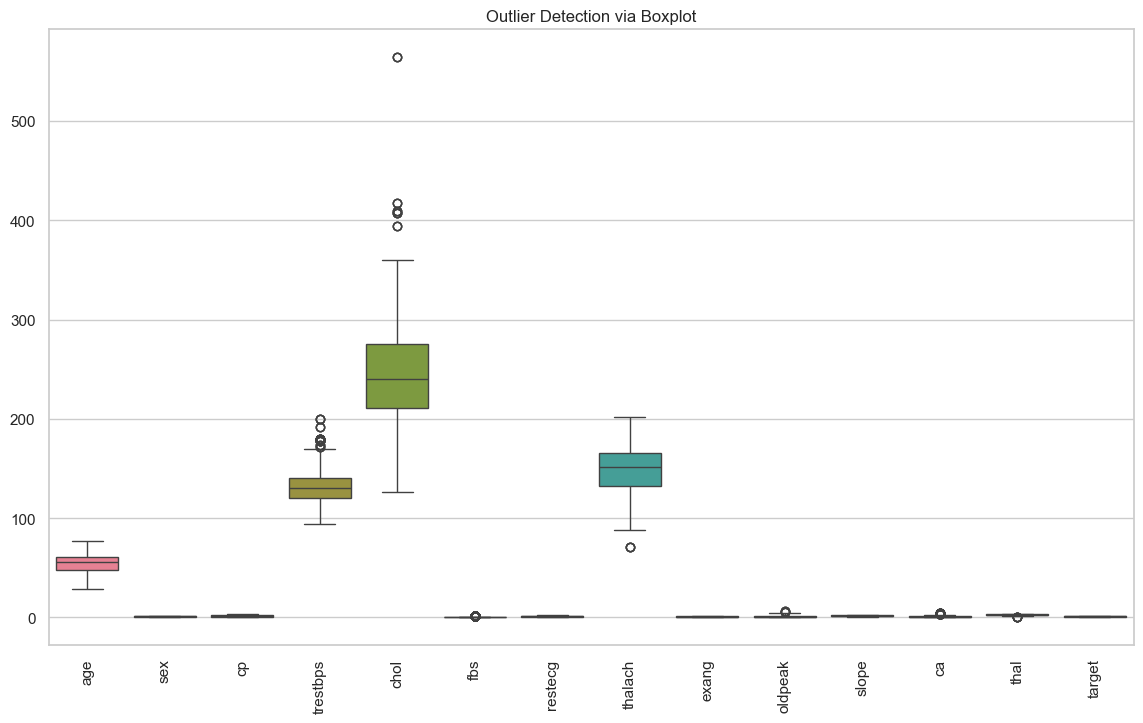

In [10]:
# ------------------------------
# 4. Exploratory Data Analysis (EDA)
# ------------------------------
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='BrBG')
plt.title('Correlation Heatmap')
plt.show()

# Histogram of all features
df.hist(figsize=(14, 10), edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

# Boxplot to check outliers
plt.figure(figsize=(14, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Outlier Detection via Boxplot")
plt.show()

In [12]:
# ------------------------------
# 5. Train/Test Split
# ------------------------------
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------------
# 6. Model Training (Logistic Regression)
# ------------------------------
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)


Accuracy: 0.7951


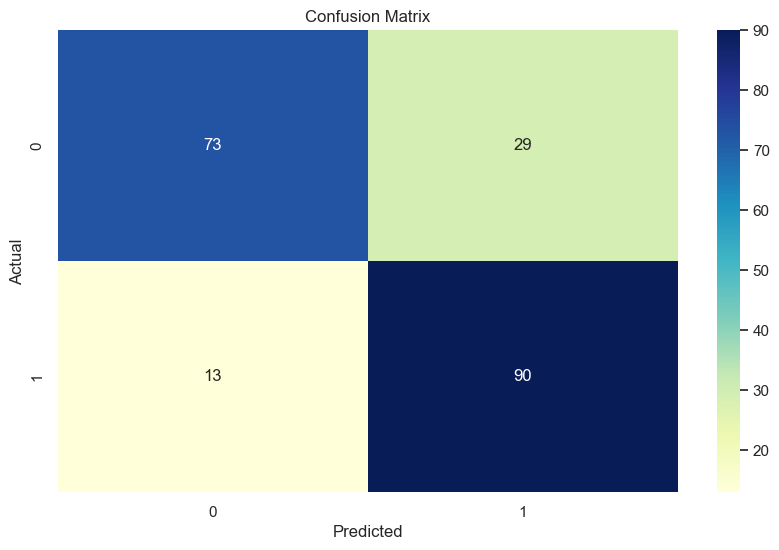

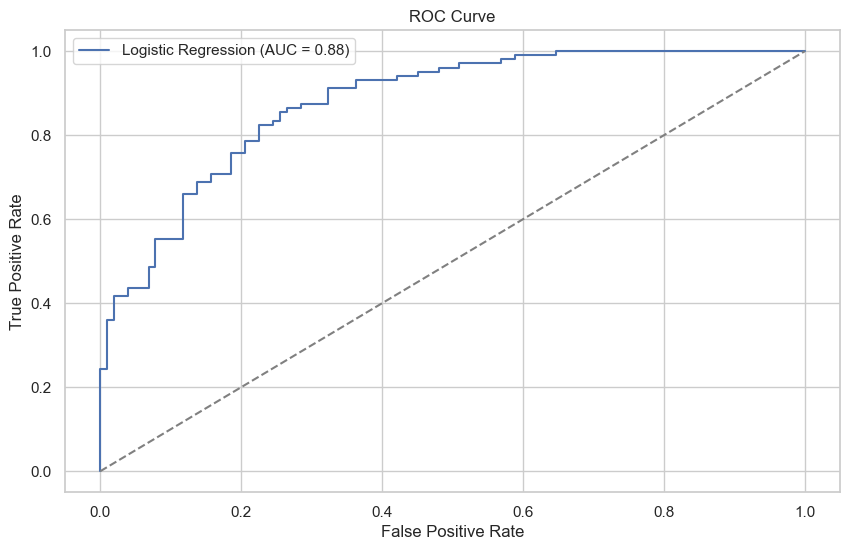

In [18]:
# ------------------------------
# 7. Evaluation using metrics: accuracy, ROC curve, and confusion matrix. 
# ------------------------------
from collections import Counter

# Prediction
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", round(accuracy, 4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve and AUC 
if len(np.unique(y_test)) == 2:
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
else:
    print("ROC Curve and AUC not shown: Only one class present in y_test:", Counter(y_test))

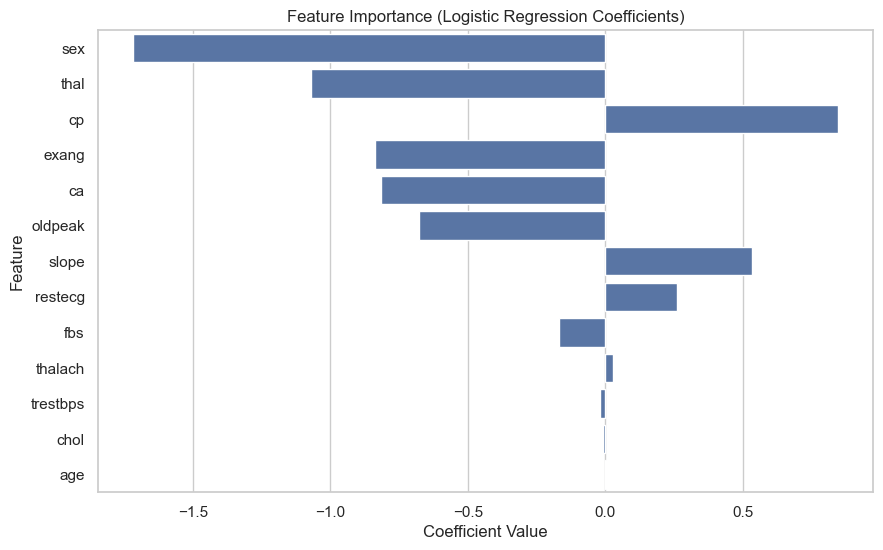

In [16]:
# ------------------------------
# 8. Feature Importance
# ------------------------------
importance = pd.Series(log_model.coef_[0], index=X.columns).sort_values(key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importance.values, y=importance.index)
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()